<a href="https://colab.research.google.com/github/chiwangchic/hello-world/blob/master/Lecture_9_Classification%20and%20confusion%20matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Today we are going to focus on computing accuracy metrics for a given machine learning model. 

In [1]:
#Load the data
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
import numpy as np
# generate 2 class dataset
X, y = make_classification(n_samples=10, n_classes=2, weights=[1,1], random_state=1)

print(X)
print(y)

[[-0.10015523 -0.51709446  0.61838026  0.44136444 -0.99702683 -2.43483776
   2.45596191  0.01740941  1.02130149 -0.11905419 -1.61188549 -1.12201873
   0.68255141  0.07782113 -0.13644474 -3.16768815  0.23249456  2.18697965
   1.0388246  -0.31011677]
 [ 0.0465673   0.52946532 -0.60392063  0.80186103  0.13770121 -0.62353073
   0.64985124  0.86888616  0.64808014 -0.10174587 -0.68476378  0.75041164
   0.5505375  -0.1809203  -0.18656977 -1.06487417 -1.23005814 -1.14434139
   0.52057634  0.79280687]
 [ 0.18515642 -0.34385368  0.41005165  1.19891788  0.04359686  0.37756379
   1.83241247  0.42349435 -2.15321974 -0.63873041  0.78992294  0.07734007
   0.11900865  0.18656139 -0.37528495 -0.61435269  0.19829972  1.12948391
   0.12182127 -0.67066229]
 [ 0.88514116  0.48851815 -0.35224985  0.28558733 -0.07557171  0.58662319
   2.41932059  0.51292982 -1.52320683  1.25286816  0.14092825 -0.29809284
  -0.34934272  0.30017032 -0.75439794 -1.60290743 -1.1425182   0.93110208
   0.83898341 -0.20889423]
 [-0

In [2]:
#X, y = np.arange(10).reshape((5, 2)), range(5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
#If int, random_state is the seed used by the random number generator
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[ 1.96710175 -1.19926803 -1.31228341  1.27375593  0.86334532  0.40890054
   3.84266872  1.62765075  0.70896364  1.23616403 -1.91437196  0.3380117
  -1.61577235  0.35054598 -1.85798186 -4.42287433 -0.03869551 -0.77516162
  -0.02461696  1.12141771]
 [ 0.18515642 -0.34385368  0.41005165  1.19891788  0.04359686  0.37756379
   1.83241247  0.42349435 -2.15321974 -0.63873041  0.78992294  0.07734007
   0.11900865  0.18656139 -0.37528495 -0.61435269  0.19829972  1.12948391
   0.12182127 -0.67066229]
 [-2.02220122 -0.22232814  1.51981682  0.31563495 -0.20075807 -0.50446586
   3.11651775  0.23009474 -2.85961623  0.82797464  0.79495321  0.76201118
  -1.39649634  1.13162939 -0.30620401 -1.52637437  2.18557541  0.87616892
   0.16003707 -1.44411381]
 [-0.9537006   0.84616065  0.69803203  0.74055645 -0.85951594  0.59357852
   1.67387756 -1.37311732 -1.28460691  0.03261455  0.2552113   0.31515939
   1.2245077  -0.62000084 -0.26621851 -0.97058301 -0.44712856  0.16938243
  -1.09491185  0.40349164]
 [ 0.

In [3]:
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

print(len(trainX))
print(len(testX))
print(len(trainy))
print(len(testy))


5
5
5
5


In [4]:
# fit a KNN model
model = KNeighborsClassifier(n_neighbors=3)
model.fit(trainX, trainy)

# predict probabilities
probs = model.predict_proba(testX)
#probs = model.predict(testX)
print(len(probs))
print(probs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
#print(len(probs))
#print(probs)

5
[[0.66666667 0.33333333]
 [0.33333333 0.66666667]
 [0.66666667 0.33333333]
 [0.66666667 0.33333333]
 [0.66666667 0.33333333]]


In [5]:
# calculate AUC
auc = roc_auc_score(testy, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(testy, probs)

AUC: 0.667


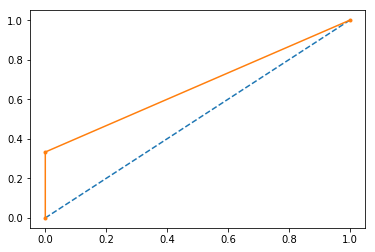

In [6]:
# plot an ROC curve
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

Lets look into Precision and Recall curves now.. 

In [7]:

from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from matplotlib import pyplot


# generate 2 class dataset
X, y = make_classification(n_samples=100, n_classes=2, weights=[1,1], random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

# fit a model
model = KNeighborsClassifier(n_neighbors=3)
model.fit(trainX, trainy)
# predict probabilities
probs = model.predict_proba(testX)
print(probs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = model.predict(testX)
print(yhat)


[[0.33333333 0.66666667]
 [0.         1.        ]
 [1.         0.        ]
 [0.66666667 0.33333333]
 [0.         1.        ]
 [0.33333333 0.66666667]
 [0.33333333 0.66666667]
 [0.         1.        ]
 [0.33333333 0.66666667]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.66666667 0.33333333]
 [0.         1.        ]
 [1.         0.        ]
 [0.66666667 0.33333333]
 [1.         0.        ]
 [1.         0.        ]
 [0.         1.        ]
 [0.33333333 0.66666667]
 [0.         1.        ]
 [0.33333333 0.66666667]
 [0.         1.        ]
 [0.         1.        ]
 [1.         0.        ]
 [0.66666667 0.33333333]
 [0.33333333 0.66666667]
 [0.66666667 0.33333333]
 [1.         0.        ]
 [0.33333333 0.66666667]
 [0.         1.        ]
 [0.66666667 0.33333333]
 [0.66666667 0.33333333]
 [1.         0.        ]
 [0.         1.        ]
 [0.33333333 0.66666667]
 [0.         1.        ]
 [0.66666667 0.33333333]
 [0.33333333 0.66666667]
 [0.33333333 0.66666667]


f1=0.833 auc=0.903 ap=0.849


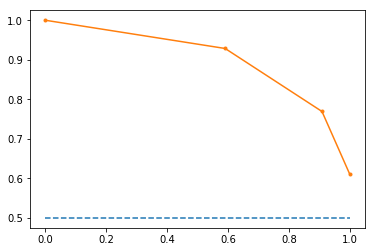

In [8]:
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(testy, probs)


# calculate F1 score
#sklearn.metrics.f1_score(y_true, y_pred...)
f1 = f1_score(testy, yhat)


# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(testy, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))


# plot no skill
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(recall, precision, marker='.')
# show the plot
pyplot.show()

**k-fold Cross-validation**

In [0]:
#k-fold cross-validation

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics



In [0]:
# read in the iris data
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6)

# check classification accuracy of KNN with K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.9736842105263158

In [12]:
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
for train, test in loo.split(X):
    print("%s %s" % (train, test))
    

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149] [0]
[  0   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96 

In [13]:
from sklearn.model_selection import KFold
from numpy import array
# data sample
data = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])


# prepare cross validation
#splits a dataset into 3 folds, shuffles prior to the split, and uses a value of 1 for the pseudorandom number generator.
kfold = KFold(3, True, 1)

# enumerate splits
for train, test in kfold.split(data):
	print('train: %s, test: %s' % (data[train], data[test]))

train: [0.1 0.4 0.5 0.6], test: [0.2 0.3]
train: [0.2 0.3 0.4 0.6], test: [0.1 0.5]
train: [0.1 0.2 0.3 0.5], test: [0.4 0.6]
